In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [22]:
# Read in the Titanic dataset

df = pd.read_csv('C:/Users/614295069/OneDrive - BT Plc/Documents/titanic.csv')

# Chi-Squared test, Cramer's correlation

The goal of this notebook is to show the use of the Chi-Squared test and Cramer's correlation. One specific situation when these statistics come in handy is when investigating the relationship of a categorical feature and the target in a classification task. Cramer's correlation coefficient allows for measuring correlation between a nominal feature and a categorical (or binary) target, and it is calculated from the Chi-Squared statistic.

## Chi-Squared distribution

The Chi-Squared ($\chi^2$) distribution is used in the Chi-Squared statistical test for independence.
This distribution has one parameter, the degrees of freedom, denoted $k$.

An observation $chi$ that has a Chi-Squared distribution, is calculated as the sum of $k$ squared observations ($x_i$) that are drawn from a Gaussian distribution.

$$chi = \sum_{i=1}^{k}{x_i^2}$$

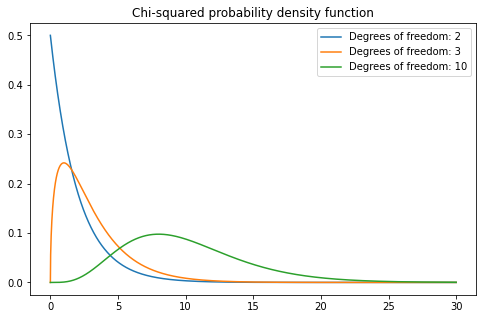

In [23]:
# import the scipy module for calculating statistics for the Chi-Squared distribution
from scipy.stats import chi2, chi2_contingency
# define sample space (quantiles)
sample_space = np.arange(0, 30, 0.01)
# plot the probability density function for different degrees of freedom values
fig = plt.figure(figsize=(8,5))
dof = 2
plt.plot(sample_space, chi2.pdf(sample_space, dof), label='Degrees of freedom: '+str(dof))
dof = 3
plt.plot(sample_space, chi2.pdf(sample_space, dof), label='Degrees of freedom: '+str(dof))
dof = 10
plt.plot(sample_space, chi2.pdf(sample_space, dof), label='Degrees of freedom: '+str(dof))
plt.title('Chi-squared probability density function')
plt.legend()
plt.show()

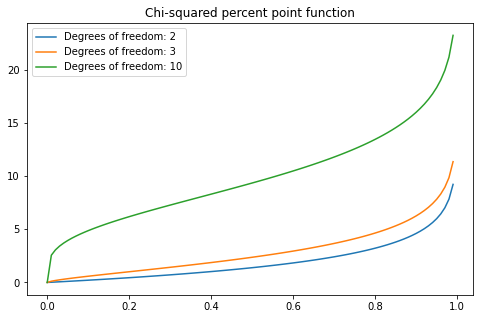

In [5]:
fig = plt.figure(figsize=(8,5))
dof = 2
plt.plot(sample_space, chi2.ppf(sample_space, dof), label='Degrees of freedom: '+str(dof))
dof = 3
plt.plot(sample_space, chi2.ppf(sample_space, dof), label='Degrees of freedom: '+str(dof))
dof = 10
plt.plot(sample_space, chi2.ppf(sample_space, dof), label='Degrees of freedom: '+str(dof))
plt.title('Chi-squared percent point function')
plt.legend()
plt.show()

## Chi-Squared Test of Independence

The Chi-Squared test is a statistical hypothesis test that assesses whether observations consisting of measures on two variables, expressed in a contingency table, are independent of each other.
The test uses a contingency table, and calculates expected frequencies for the categories. Then determines whether the observed frequencies matches the expected frequencies.

H0: The observed frequencies for a categorical variable match the expected frequencies for the categorical variable. 

The test-statistic:
$$ \chi^2 = \sum_{i=1}^{n}{\frac{(O_i-E_i)^2}{E_i}} $$

- $ \chi^2 : $ Pearson's cumulative test statistic. 
- $n : $ the number of cells in the table ($n = rows*columns$)
- $O_i : $ the number of observations of type $i$.
- $N : $ the total number of observations.
- $E_i : $ the expected count of type $i$. $E_i = N * p_i$.
- $p_i : $ the fraction of type $i$ in the population.


The degrees of freedom is calculated based on the contingency table: 
$$dof = (rows - 1) * (cols - 1)$$

The test uses a critical value to establish statistical significance. The critical value is determined by the distribution and the chosen significance level ($\alpha$).
With $\alpha=0.05$, the critical value is the value of the percent point function (the inverse of the cummulative density function) at the probability value $prob$, where $prob = 1-\alpha$.

The test calculates a statistic that has a Chi-Squared distribution. The test statistic is compared to the critical value, to to decide if the null hypothesis can be rejected. Small values of the statistic indicate that the observations are close to the expectations.

### Example of alculating the critical value for a Chi-Squared test

In [7]:
# probability
alpha = 0.05
prob = 1 - alpha

# degrees of freedom
dof = 10

# calculate the 95th percentile of the distribution
value = chi2.ppf(prob, dof)
print(value)

# check value of the cummulative density function at the calculate
prob_cdf = chi2.cdf(value, dof)
print(prob_cdf)

18.307038053275146
0.95


### Example of a Chi-Squared test
Was passenger class independent of survival based on the Titanic dataset?

In [13]:
table = pd.crosstab(df["Survived"], df["Pclass"])
table

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [14]:
table/np.sum(table)

Pclass,1,2,3
Survived,,,
0,0.37037,0.527174,0.757637
1,0.62963,0.472826,0.242363


In [9]:
# Chi squared statistic
stat, p, dof, expected = chi2_contingency(table)

# Testing for significance
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')


Dependent (reject H0)


Was passenger sex independent of survival?

In [15]:
table = pd.crosstab(df["Survived"], df["Sex"])

In [16]:
table/np.sum(table)

Sex,female,male
Survived,,
0,0.257962,0.811092
1,0.742038,0.188908


In [17]:
# Chi squared statistic
stat, p, dof, expected = chi2_contingency(table)

# Testing for significance
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')


Dependent (reject H0)


## Measure of correlation for nominal variables: Cramér's V

Cramer's V is used to examine the association between two categorical (nominal) variables. Its value is a number between 0 and 1 that indicates how strongly two categorical variables are associated.
In the case of a 2 × 2 contingency table Cramér's V is equal to the absolute value of Phi coefficient (https://en.wikipedia.org/wiki/Phi_coefficient).

$$ V = \sqrt\frac{\chi^2/N}{min(cols-1,rows-1)} $$

- $ \chi^2 : $ Pearson's cumulative test statistic. 
- $N : $ the total number of observations.

Calculate Cramer's V for ticket class and survival

In [25]:
table = pd.crosstab(df["Survived"], df["Pclass"])
stat, p, dof, expected = chi2_contingency(table)

In [26]:
# Calculating correlation (Cramér's V)
size = np.sum(np.array(table))
min_dim = min(table.shape)-1
V = np.sqrt((stat/size) / min_dim)

print(V)

0.33981738800531175


### Sex

In [20]:
table = pd.crosstab(df["Survived"], df["Sex"])
stat, p, dof, expected = chi2_contingency(table)

In [21]:
# Calculating correlation (Cramér's V)
size = np.sum(np.array(table))
min_dim = min(table.shape)-1
V = np.sqrt((stat/size) / min_dim)

print(V)

0.5409359434469282


The sex of the passenger has a stronger association with the survival than the passenger class.

### Port of Embarkation

In [30]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
table = pd.crosstab(df["Survived"], df["Embarked"])
stat, p, dof, expected = chi2_contingency(table)

In [29]:
# Calculating correlation (Cramér's V)
size = np.sum(np.array(table))
min_dim = min(table.shape)-1
V = np.sqrt((stat/size) / min_dim)

print(V)

0.17261682709984438


## Limitations of Cramer's V

Note that as chi-squared values tend to increase with the number of cells, the greater the difference between r (rows) and c (columns), the more likely V will tend to 1 without strong evidence of a meaningful correlation.

In [35]:
df['first_letter_name'] = [n[0] for n in df.Name]

In [37]:
df.first_letter_name.value_counts().head()

S    86
M    74
B    72
H    69
C    69
Name: first_letter_name, dtype: int64

In [38]:
table = pd.crosstab(df["Survived"], df["first_letter_name"])
stat, p, dof, expected = chi2_contingency(table)

In [39]:
# Calculating correlation (Cramér's V)
size = np.sum(np.array(table))
min_dim = min(table.shape)-1
V = np.sqrt((stat/size) / min_dim)

print(V)

0.2114476263594049


In [43]:
df['first2_letter_name'] = [n[:2] for n in df.Name]

In [44]:
df.first2_letter_name.value_counts().head()

Ha    35
Ca    26
Ba    22
Pe    20
Pa    20
Name: first2_letter_name, dtype: int64

In [45]:
table = pd.crosstab(df["Survived"], df["first2_letter_name"])
stat, p, dof, expected = chi2_contingency(table)

In [46]:
# Calculating correlation (Cramér's V)
size = np.sum(np.array(table))
min_dim = min(table.shape)-1
V = np.sqrt((stat/size) / min_dim)

print(V)

0.4192229381981348


In [55]:
df['first_letter_category'] = [1 if n[0].upper() in ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M"] else 0 for n in df.Name]

In [56]:
df.first_letter_category.value_counts().head()

1    574
0    317
Name: first_letter_category, dtype: int64

In [57]:
table = pd.crosstab(df["Survived"], df["first_letter_category"])
stat, p, dof, expected = chi2_contingency(table)

In [58]:
# Calculating correlation (Cramér's V)
size = np.sum(np.array(table))
min_dim = min(table.shape)-1
V = np.sqrt((stat/size) / min_dim)

print(V)

0.058698218641754854
